## Final Project Submission

Please fill out:
* Student name: Colleta Kiilu
* Student pace: self paced / **part time** / full time
* Scheduled project review date/time: 08/09/2024
* Instructor name: William Okomba
* Blog post URL:


![airplane accident](https://gifdb.com/images/high/plane-jet-crash-explosion-jy9cqg43kri1oa2m.webp)
Source: [GIFDB.com](https://gifdb.com/)

# **OVERVIEW**
As part of the company's strategic growth into new markets, there is increasing interest in joining the aviation industry. The goal is to purchase and operate aircraft for both commercial and private enterprises. However, before making any decisions, the business needs to be aware of the possible dangers associated with various aircraft types.

This analysis focuses on identifying the lowest-risk aircraft models by reviewing data from the National Transportation Safety Board (NTSB) aviation accident database. The key indicators to be evaluated are damage to the aircraft, frequency of accidents/incidents and severity of injuries.

Ultimately, this analysis will provide the company, under the guidance of the Head of the new Aviation Division, with data-driven insights and recommendations about which aircraft models to invest in for this new business venture.


## **BUSINESS** **UNDERSTANDING**
xxxxx

# **Business Questions**

1.   Which aircraft models have the lowest accident rates?
2.   Are there specific factors (e.g., weather conditions, flight phases) that significantly increase the risk of accidents for certain aircraft?
3. What are the trends over time, and how do they impact decision-making for future aircraft purchases?





# **DATA UNDERSTANDING**

In [62]:
# import data analysis libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [63]:
# import data and create df
# df = pd.read_csv("AviationData.csv") # encoding issues
df = pd.read_csv("AviationData.csv", encoding="latin-1")

#checking the first 5 columns
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [64]:
#checking the last 5 columns
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [65]:
# checking the dataset information
df.info()

# The aviation data frame indicates that we have 88889 Rows and 31 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [66]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [67]:
# Listing the columns in the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [68]:
#checking the dataset shape
df.shape

# 88889 events, 31 columns

(88889, 31)

### **Data Cleaning**

In [69]:
df.duplicated().sum()

# The data set has no duplicates

0

In [70]:
# make df copy to be used in data cleaning

data = df.copy()

In [71]:
# percentage of missing values per column
# sorted in descending order

data.isna().sum().sort_values(ascending=False)/len(data)*100

,0
Schedule,85.845268
Air.carrier,81.271023
FAR.Description,63.974170
Aircraft.Category,63.677170
Longitude,61.330423
Latitude,61.320298
Airport.Code,43.601570
Airport.Name,40.708074
Broad.phase.of.flight,30.560587
Publication.Date,15.492356


In [72]:
# check for unique values in each column

for col in data.columns:
    print({col})
    print(data[col].unique())
    print()

{'Event.Id'}
['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']

{'Investigation.Type'}
['Accident' 'Incident']

{'Accident.Number'}
['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097']

{'Event.Date'}
['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29']

{'Location'}
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']

{'Country'}
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa 

In [73]:
#Drop irrelevant columns with a high percentage of missing values and may not add any value in my analysis

data.drop(['Schedule', 'Air.carrier', 'Latitude', 'Longitude','FAR.Description',
           'Accident.Number', 'Airport.Code', 'Airport.Name', 'Publication.Date', 'Location', 'Report.Status', 'Registration.Number'],
          axis=1, inplace=True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Amateur.Built           88787 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81793 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

In [75]:
# Check the number of missing values in each column

data.isna().sum().sort_values(ascending=False)

,0
Aircraft.Category,56602
Broad.phase.of.flight,27165
Total.Serious.Injuries,12510
Total.Minor.Injuries,11933
Total.Fatal.Injuries,11401
Engine.Type,7096
Purpose.of.flight,6192
Number.of.Engines,6084
Total.Uninjured,5912
Weather.Condition,4492


In [76]:
print(data['Aircraft.Category'].unique())

[nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']


In [77]:
# Replace missing values in 'Aircraft.Category' column with 'Unknown'
data['Aircraft.Category'].fillna('Unknown', inplace=True)

# Replace missing values in 'Broad.phase.of.flight' column with 'Unknown'
data['Broad.phase.of.flight'].fillna('Unknown', inplace=True)

# Replace missing values in 'Engine.Type' column with 'Unknown'
data['Engine.Type'].fillna('Unknown', inplace=True)

# Replace missing values in 'Purpose.of.flight' column with 'Unknown'
data['Purpose.of.flight'].fillna('Unknown', inplace=True)

# Replace missing values in 'Number.of.Engines' column with 'Unknown'
# the number of engines is also a critical factor when determing the model of aircraft to purchase
data['Number.of.Engines'].fillna('Unknown', inplace=True)

# Replace missing values in 'Weather.Condition' column with 'UNK'
data['Weather.Condition'].fillna('UNK', inplace=True)

# Replace missing values in 'Aircraft.damage' column with 'Unspecified'
data['Aircraft.damage'].fillna('Unspecified', inplace=True)

# Replace missing values in 'Country' column with 'Unknown'
data['Country'].fillna('Unknown', inplace=True)

# Replace missing values in 'Amateur.Built' column with 'Unknown'
data['Amateur.Built'].fillna('Unknown', inplace=True)

# Replace missing values in 'Make' column with 'Unknown'
data['Make'].fillna('Unknown', inplace=True)

# Replace missing values in 'Total.Serious.Injuries' column with 0
data['Total.Serious.Injuries'].fillna(0, inplace=True)

# Replace missing values in 'Total.Minor.Injuries' column with 0
data['Total.Minor.Injuries'].fillna(0, inplace=True)

In [78]:
# Replace all 'Incident' in 'Injury.Severity' column with 'Non-Fatal'

data['Injury.Severity'].replace('Incident',  'Non-Fatal', inplace=True)

# Replace all 'Unavailable' in 'Injury.Severity' column with 'Unknown'
data['Injury.Severity'].replace('Unavailable',  'Unknown', inplace=True)

# Strip all numbericals from 'Injury.Severity' column as they are already included in the 'Total.Fatal.Injuries' column
# data['Injury.Severity'].str.replace(r'\(\d+\)', '', regex=True)
data['Injury.Severity'] = data['Injury.Severity'].str.replace(r'\(\d+\)', '', regex=True)

# Replace missing values in 'Injury.Severity' column with 'Unknown'
data['Injury.Severity'].fillna('Unknown', inplace=True)


In [79]:
# Replace all missing values(Blanks) in 'Total.Fatal.Injuries' column with 0 as they are all 'Non-Fatal' cases
# when compared with data in the 'Injury.severity' column
data['Total.Fatal.Injuries'].fillna(0, inplace=True)

# Replace all blanks in 'Total.Uninjured' column with '0' if 'Total.Fatal.Injuries' column has a value greater than or equal to 1.
# The reasoning behind this is that you cannot have a fatality and uninjured within the same event.

data.loc[(data['Total.Fatal.Injuries'] >= 1) & (data['Total.Uninjured'].isnull()), 'Total.Uninjured'] = 0
data['Total.Uninjured'] = data['Total.Uninjured'].fillna(0, inplace=True)

# Now replace the remaining null values (blanks) in the 'Total.Uninjured' column with 'Unknown'
data.loc[data['Total.Uninjured'].isnull(), 'Total.Uninjured'] = 'Unknown'
data['Total.Uninjured'].fillna('Uknown', inplace=True)

In [80]:
column_name = 'Model'
print(data[column_name].unique())

['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']


In [81]:
# Data cleaning for the 'model' column which is very critical for analysis
# The goal is to purchase and operate aircraft for both commercial and private enterprises hence the anlayisis will focus on idenifying the low risk models for evidence based deciosn making

# Replace all 'wrongly spelt model names' in 'model' column with 'the correct model names as listed'
data['Model'].replace('PA24-180',  'PA-24-180', inplace=True)
data['Model'].replace('PA28-161',  'PA-28-161', inplace=True)
data['Model'].replace('R22 MARINER',  'R-22 MARINER', inplace=True)
data['Model'].replace('S2R', 'S-2R', inplace=True)

# Replace missing values in 'Model' column with 'Unknown'
data['Model'].fillna('Unknown', inplace=True)



In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Country                 88889 non-null  object 
 4   Injury.Severity         88889 non-null  object 
 5   Aircraft.damage         88889 non-null  object 
 6   Aircraft.Category       88889 non-null  object 
 7   Make                    88889 non-null  object 
 8   Model                   88889 non-null  object 
 9   Amateur.Built           88889 non-null  object 
 10  Number.of.Engines       88889 non-null  object 
 11  Engine.Type             88889 non-null  object 
 12  Purpose.of.flight       88889 non-null  object 
 13  Total.Fatal.Injuries    88889 non-null  float64
 14  Total.Serious.Injuries  88889 non-null

In [83]:
data.head()

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,1948-10-24,United States,Fatal,Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,Unknown,UNK,Cruise
1,20001218X45447,Accident,1962-07-19,United States,Fatal,Destroyed,Unknown,Piper,PA-24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,Unknown,UNK,Unknown
2,20061025X01555,Accident,1974-08-30,United States,Fatal,Destroyed,Unknown,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,Unknown,IMC,Cruise
3,20001218X45448,Accident,1977-06-19,United States,Fatal,Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,Unknown,IMC,Cruise
4,20041105X01764,Accident,1979-08-02,United States,Fatal,Destroyed,Unknown,Cessna,501,No,Unknown,Unknown,Personal,1.0,2.0,0.0,Unknown,VMC,Approach


In [84]:
data['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Unknown', 'Minor', 'Serious'], dtype=object)

insert a comment to confirm no missing values in the data set

### **Convert Event.Date Column to DateTime**

In [85]:
data['Event.Date'] = pd.to_datetime(data['Event.Date'])
data['Event.Date'].dtype # confirm datatype

dtype('<M8[ns]')

In [86]:
data['Event.Date'].head()

,Event.Date
0,1948-10-24
1,1962-07-19
2,1974-08-30
3,1977-06-19
4,1979-08-02


In [87]:
# extract year and month and create Event.Year and Event.Month columns

data["Event.Year"] = data["Event.Date"].dt.year
data["Event.Month"] = data["Event.Date"].dt.month_name()
data.head()

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Event.Year,Event.Month
0,20001218X45444,Accident,1948-10-24,United States,Fatal,Destroyed,Unknown,Stinson,108-3,No,...,Reciprocating,Personal,2.0,0.0,0.0,Unknown,UNK,Cruise,1948,October
1,20001218X45447,Accident,1962-07-19,United States,Fatal,Destroyed,Unknown,Piper,PA-24-180,No,...,Reciprocating,Personal,4.0,0.0,0.0,Unknown,UNK,Unknown,1962,July
2,20061025X01555,Accident,1974-08-30,United States,Fatal,Destroyed,Unknown,Cessna,172M,No,...,Reciprocating,Personal,3.0,0.0,0.0,Unknown,IMC,Cruise,1974,August
3,20001218X45448,Accident,1977-06-19,United States,Fatal,Destroyed,Unknown,Rockwell,112,No,...,Reciprocating,Personal,2.0,0.0,0.0,Unknown,IMC,Cruise,1977,June
4,20041105X01764,Accident,1979-08-02,United States,Fatal,Destroyed,Unknown,Cessna,501,No,...,Unknown,Personal,1.0,2.0,0.0,Unknown,VMC,Approach,1979,August


In [88]:
# The data is now clean for Exploratory data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Event.Date              88889 non-null  datetime64[ns]
 3   Country                 88889 non-null  object        
 4   Injury.Severity         88889 non-null  object        
 5   Aircraft.damage         88889 non-null  object        
 6   Aircraft.Category       88889 non-null  object        
 7   Make                    88889 non-null  object        
 8   Model                   88889 non-null  object        
 9   Amateur.Built           88889 non-null  object        
 10  Number.of.Engines       88889 non-null  object        
 11  Engine.Type             88889 non-null  object        
 12  Purpose.of.flight       88889 non-null  object

In [89]:
#save the new dataframe in csv format

data.to_csv('cleaned_aviation_data.csv', index=False)

# **EXPLORATORY DATA ANALYSIS (EDA)**

**EDA columns of interest**
 'Country' 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', , 'Make', 'Model', 'Engine.Type', 'Schedule', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight'


** Questions **

1. What are the most reliable aircraft models(with lowest risks) in the market, both for commercial and private use

2. Are there specific factors (e.g., weather conditions, flight phases) that significantly increase the risk of accidents for certain aircraft?

3. What is the level of severity for the top 15 prefered models?

4. What is the incidence rate by Country, year, purpose of flight and model?

In [90]:
# Now load the clean data set fro EDA

aviation = pd.read_csv('/content/cleaned_aviation_data.csv')
aviation.head()

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Event.Year,Event.Month
0,20001218X45444,Accident,1948-10-24,United States,Fatal,Destroyed,Unknown,Stinson,108-3,No,...,Reciprocating,Personal,2.0,0.0,0.0,Unknown,UNK,Cruise,1948,October
1,20001218X45447,Accident,1962-07-19,United States,Fatal,Destroyed,Unknown,Piper,PA-24-180,No,...,Reciprocating,Personal,4.0,0.0,0.0,Unknown,UNK,Unknown,1962,July
2,20061025X01555,Accident,1974-08-30,United States,Fatal,Destroyed,Unknown,Cessna,172M,No,...,Reciprocating,Personal,3.0,0.0,0.0,Unknown,IMC,Cruise,1974,August
3,20001218X45448,Accident,1977-06-19,United States,Fatal,Destroyed,Unknown,Rockwell,112,No,...,Reciprocating,Personal,2.0,0.0,0.0,Unknown,IMC,Cruise,1977,June
4,20041105X01764,Accident,1979-08-02,United States,Fatal,Destroyed,Unknown,Cessna,501,No,...,Unknown,Personal,1.0,2.0,0.0,Unknown,VMC,Approach,1979,August


In [91]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Country                 88889 non-null  object 
 4   Injury.Severity         88889 non-null  object 
 5   Aircraft.damage         88889 non-null  object 
 6   Aircraft.Category       88889 non-null  object 
 7   Make                    88889 non-null  object 
 8   Model                   88889 non-null  object 
 9   Amateur.Built           88889 non-null  object 
 10  Number.of.Engines       88889 non-null  object 
 11  Engine.Type             88889 non-null  object 
 12  Purpose.of.flight       88889 non-null  object 
 13  Total.Fatal.Injuries    88889 non-null  float64
 14  Total.Serious.Injuries  88889 non-null

# **1. Univariate Data Analysis**

Univariate analysis is a statistical technique used to describe and summarize the distribution of a single variable. It is often used as a preliminary step in data analysis to identify patterns, trends, and outliers.

In [92]:
# 1. count plot - Which investigation type has the highest number of events?
investigation_type_counts = aviation['Investigation.Type'].value_counts()
print(investigation_type_counts)


Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64


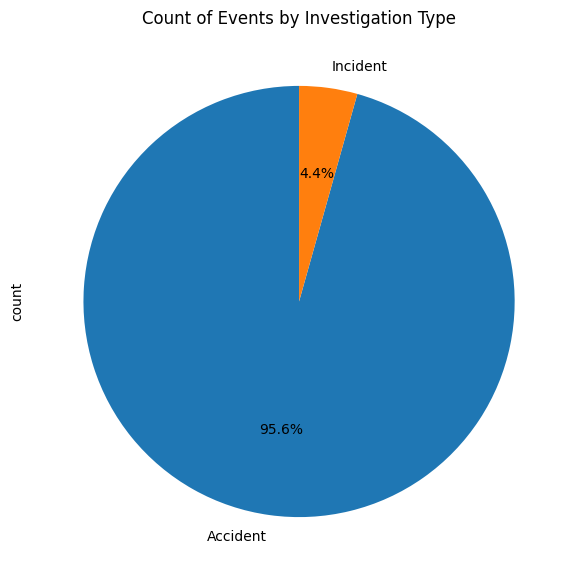

In [93]:
plt.figure(figsize=(10, 7))
data["Investigation.Type"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Count of Events by Investigation Type")
plt.show()

The Figure above shows that 96% of all events that happened were accidents while only 4% were incidents.

An **accident** is defined as “an occurrence associated with the operation of an aircraft which takes place between the time any person boards the aircraft with the intention of flight and all such persons have disembarked, and in which any person suffers death or serious injury, or in which the aircraft receives substantial damage”. An **incident** is defined as “an occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations.”

In [94]:
# 2. Count of events by country - Which Country had the highest number of events?
country_counts = aviation['Country'].value_counts()
print(country_counts)



Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Saint Vincent and the Grenadines        1
Cambodia                                1
Malampa                                 1
AY                                      1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64


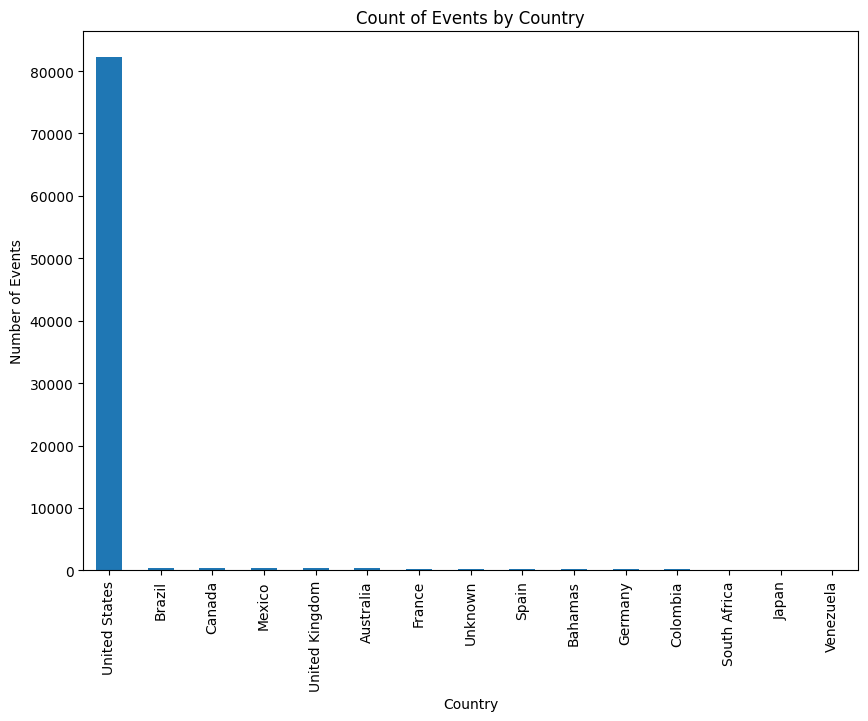

In [95]:
# Plot
plt.figure(figsize=(10, 7))
aviation["Country"].value_counts().head(15).plot(kind='bar')
plt.title("Count of Events by Country")
plt.xlabel("Country")
plt.ylabel("Number of Events")
plt.show()

United States had the highest numbers of events (82,248) including both accidents and Incidents followed by Brazil with 374 events.

The high concentration of events including both accidents and incidents in the United States (US) is due to the fact that the National Transportation Safety Board (NTSB) mainly deals with accidents within the US, in international waters, or with US aircrafts.

In [96]:
# 3. Count of events by aircarft make - Which aircraft make had the highest number of events?
make_counts = aviation['Make'].value_counts()
print(make_counts)

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64


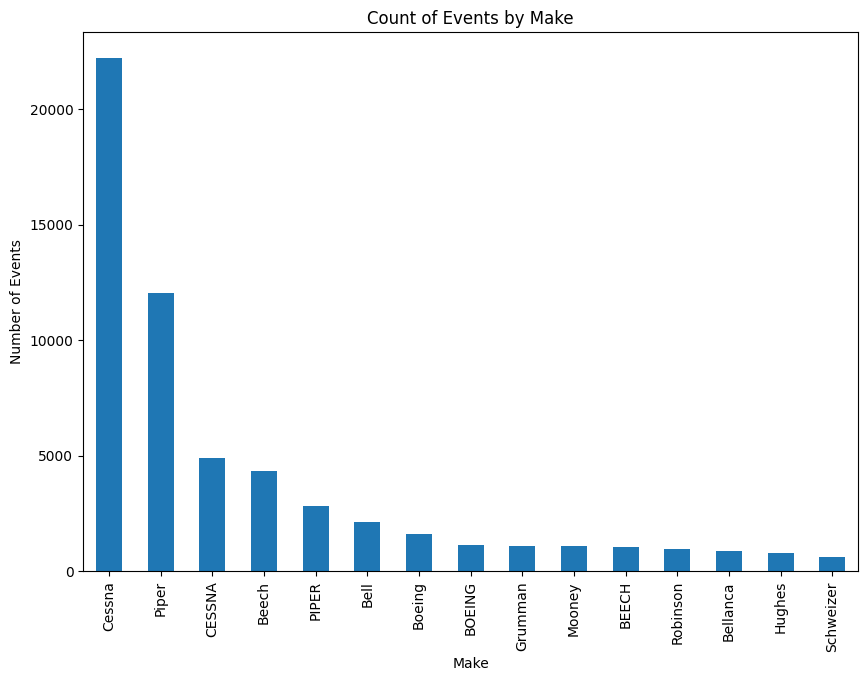

In [97]:
# Plot
plt.figure(figsize=(10, 7))
aviation["Make"].value_counts().head(15).plot(kind='bar')
plt.title("Count of Events by Make")
plt.xlabel("Make")
plt.ylabel("Number of Events")
plt.show()

The top 5 aircraft makes with the highest number of events are;  Cessna   (22,227), Piper (12,029), CESSNA (4,922), Beech (4,330) and PIPER (2,841)




In [98]:
# 4. Severity of events by injuries - What is the severity of all injuries by event?
injury_severity_counts = aviation['Injury.Severity'].value_counts()
print(injury_severity_counts)

Injury.Severity
Non-Fatal    69576
Fatal        17826
Unknown       1096
Minor          218
Serious        173
Name: count, dtype: int64


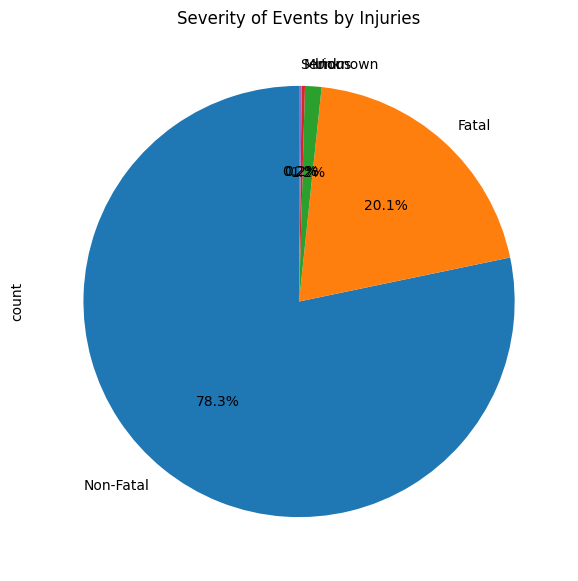

In [99]:
plt.figure(figsize=(10, 7))
data["Injury.Severity"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Severity of Events by Injuries")
plt.show()

**78.3% **of all events that occured were Non-Fatal while only **20.1% **were Fatal.

In [100]:
# 5. Count of events by Year - Whih year had the highest number of events?
year_counts = aviation['Event.Year'].value_counts()
print(year_counts)


Event.Year
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1995    2309
1994    2257
1998    2226
2000    2220
1999    2209
1996    2187
1997    2148
2003    2085
2001    2063
2005    2031
2002    2020
2007    2016
2004    1952
2008    1893
2006    1851
2011    1850
2012    1835
2010    1786
2009    1783
2018    1681
2016    1664
2017    1638
2019    1624
2022    1607
2015    1582
2013    1561
2021    1545
2014    1535
2020    1392
1979       2
1962       1
1981       1
1977       1
1974       1
1948       1
Name: count, dtype: int64


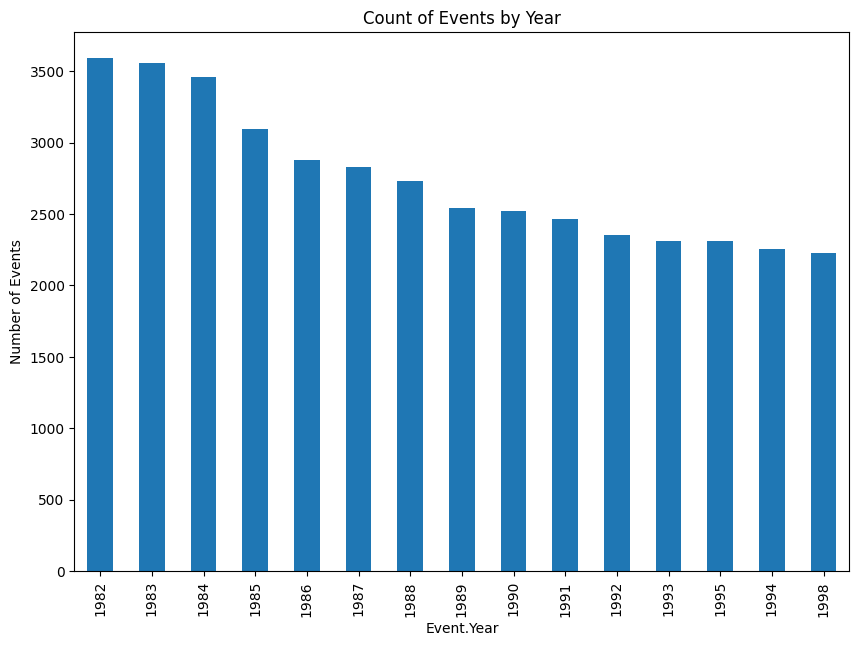

In [101]:
# Plot events by year
plt.figure(figsize=(10, 7))
aviation["Event.Year"].value_counts().head(15).plot(kind='bar')
plt.title("Count of Events by Year")
plt.xlabel("Event.Year")
plt.ylabel("Number of Events")
plt.show()

# 2. **Bivariate Analysis**

Bivariate analysis is a statistical technique used to describe the relationship between two variables. It is often used to identify patterns, trends, and correlations.

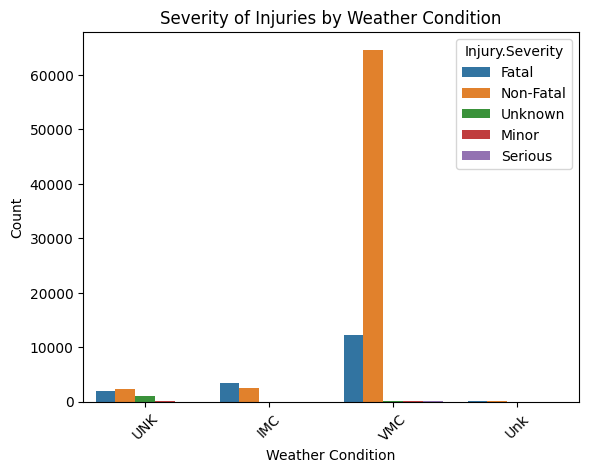

In [105]:
# Severity of the injuries by weather condition
sns.countplot(x='Weather.Condition', hue='Injury.Severity', data=aviation)
plt.title('Severity of Injuries by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Most accidents are expected to happen during bad weather due to poorvisibilty. from the figure above, most of the accidents that occur during Instrument Meteorological Conditions(IMC) are fatal whereas the majority of accidents thats occur in Visual Meteorological Condition(VMC) are Non-Fatal

IMC generrally means that the weather bad as it is restricting the visibility,therefore need for aircraft flight instruments to fly safe hence more accidents expected due to poor visibility

VMC generally means that the visibility is good and clouds are clear hence allowing the aircraft to fly by visual reference


In [107]:
phase_of_flight_counts = aviation['Broad.phase.of.flight'].value_counts()
print(phase_of_flight_counts)

Broad.phase.of.flight
Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: count, dtype: int64


From the summary above, Most events occured during landing and take-off

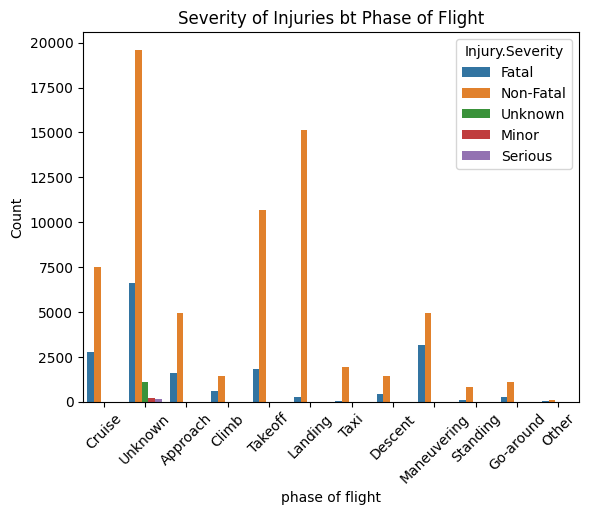

In [108]:
# Severity of the injuries by Phase of flight
sns.countplot(x='Broad.phase.of.flight', hue='Injury.Severity', data=aviation)
plt.title('Severity of Injuries bt Phase of Flight')
plt.xlabel('phase of flight')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Broad.phase.of.flight', ylabel='Total.Fatal.Injuries'>

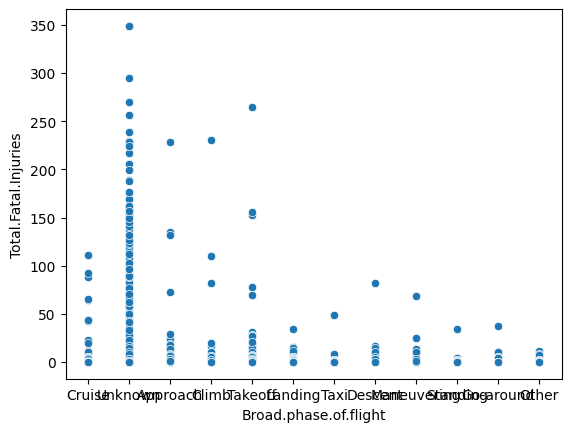

In [110]:
# Scatter plot
sns.scatterplot(y=data['Total.Fatal.Injuries'], x=data['Broad.phase.of.flight'])

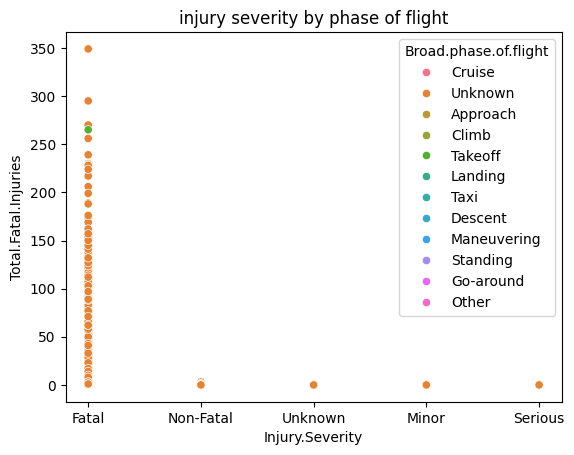

In [116]:
#check relationship between bill, tips and gender
sns.scatterplot(x='Injury.Severity', y='Total.Fatal.Injuries', hue='Broad.phase.of.flight', data=aviation)
plt.title("injury severity by phase of flight")
plt.show()